"""
Verification with:
Yao, Y, Mobasher, B, Wang, J, Xu, Q.
Analytical approach for the design of flexural elements made of
reinforced ultra‐high performance concrete. Structural Concrete. 2020; 1– 20.
https://doi.org/10.1002/suco.201900404
"""

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from bmcs_beam.moment_curvature.moment_curvature_ import MomentCurvature, ModelData

In [2]:
# For info (left is the notation in Mobasher paper, right is notation in this file):
# ------------------------------------------------------------------
# E = E_ct
# E_c = E_cc
# E_s = E_j
# eps_cr = eps_cr
# eps_cu = eps_cu
# eps_tu = eps_tu
# eps_cy = eps_cy
# mu = mu

# gamma = E_cc/E_ct
# omega = eps_cy/eps_cr
# lambda_cu = eps_cu/eps_cr
# beta_tu = eps_tu/eps_cr
# psi = eps_sy_j/eps_cr
# n = E_j/E_ct
# alpha = z_j/h

# r = A_s_c/A_s_t

# rho_g = A_j[0]/A_c # where A_j[0] must be tension steel area
# ------------------------------------------------------------------

In [3]:
def new_concise_way():
    mc = MomentCurvature(idx=25, n_m=100)

    model_data = ModelData()

    # Material parameters [mm], [N/mm2]
    model_data.h = 666
    model_data.E_ct = 24000
    model_data.E_cc = 24000
    model_data.eps_cr = 0.000125
    model_data.eps_cy = 0.0010625  # 8.5 * eps_cr_
    model_data.eps_cu = 0.0035
    model_data.eps_tu = 0.02
    model_data.mu = 0.33
    # Defining a variable width b_z_ (T-section as an example)
    b_w = 50
    b_f = 500
    h_w = 0.85 * model_data.h
    b_z_ = sp.Piecewise((b_w, mc.mcs.z < h_w), (b_f, mc.mcs.z >= h_w))
    model_data.b = b_z_
    # 2 layers reinforcement details
    model_data.A_j = np.array([250, 0])  # A_j[0] for tension steel / A_j[1] for compression steel
    model_data.z_j = np.array([0.1 * model_data.h, 0.9 * model_data.h])
    model_data.E_j = np.array([210000, 210000])
    model_data.eps_sy_j = np.array([0.002, 0.002])

    mc.model_data = model_data
    # If plot_norm is used, use the following:
    # mc.kappa_range = (0, mc.kappa_cr * 100, 100
    mc.kappa_range = (-0.00002, 0.00002, 100)
    
    
    # Plotting
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))
    mc.plot(ax1, ax2)
    plt.show()

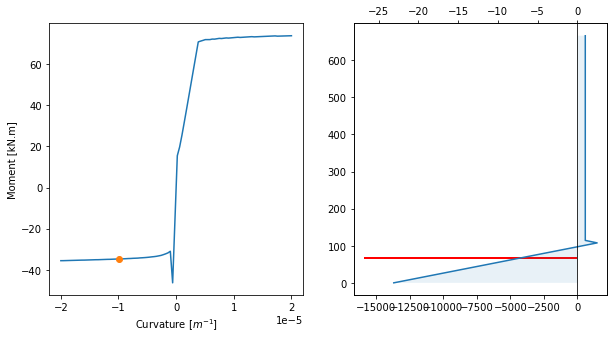

In [4]:
def old_way_with_mobasher_paper_symbols():
    # Parameters entry
    # (Values from parametric study in paper p.11 to draw Fig. 7)
    z = sp.Symbol('z')

    E_ct_ = 24000
    eps_cr_ = 0.000125
    gamma_ = 1
    omega_ = 8.5
    lambda_cu_ = 28
    beta_tu_ = 160
    psi_ = 16
    n_ = 8.75
    alpha_ = 0.9

    mu_ = 0.33
    rho_g_ = 0.003
    
    # not given in paper
    r_ = 0.0

    h_ = 666
    zeta = 0.15  # WHY USING 0.15, 0.2 ... gives wrong results!!!
    b_w = 50  # o = 0.1
    b_f = 500
    h_w = (1 - zeta) * h_
    # Substituting formulas:
    E_cc_ = gamma_ * E_ct_
    eps_cy_ = omega_ * eps_cr_
    eps_cu_ = lambda_cu_ * eps_cr_
    eps_tu_ = beta_tu_ * eps_cr_
    eps_sy_j_ = np.array([psi_ * eps_cr_, psi_ * eps_cr_])
    E_j_ = np.array([n_ * E_ct_, n_ * E_ct_])
    z_j_ = np.array([h_ * (1 - alpha_), alpha_ * h_])
    # Defining a variable b
    b_z_ = sp.Piecewise(
        (b_w, z < h_w),
        (b_f, z >= h_w)
    )
    A_c_ = sp.integrate(b_z_, (z, 0, h_))
    A_s_t_ = rho_g_ * A_c_
    A_s_c_ = r_ * A_s_t_
    A_j_ = np.array([A_s_t_, A_s_c_])  # A_j[0] must be tension steel area
    
    ''' Creating MomentCurvature object '''

    mc = MomentCurvature(idx=25, n_m=100)

    model_data = ModelData()
    model_data.h = h_
    model_data.E_ct = E_ct_
    model_data.E_cc = E_cc_
    model_data.eps_cr = eps_cr_
    model_data.eps_cy = eps_cy_
    model_data.eps_cu = eps_cu_
    model_data.mu = mu_
    model_data.eps_tu = eps_tu_

    model_data.eps_sy_j = eps_sy_j_
    model_data.z_j = z_j_
    model_data.A_j = A_j_
    model_data.E_j = E_j_

    model_data.b = b_z_
    
    mc.model_data = model_data

    mc.kappa_range = (-0.00002, 0.00002, 100)
    
    # Plotting
    fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 5))
    mc.plot(ax1, ax2)
    plt.show()


if __name__ == '__main__':
    new_concise_way()
    # old_way_with_mobasher_paper_symbols()